In [11]:
import scorer
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [38]:
countries = [
"Australia",
"Germany",
"Japan",
"Netherlands",
"New Zealand",
"Poland",
"Russia",
"Singapore",
"Spain",
'Sweden',
'Ukraine',
'United States']

islands = [
    'Kiribati',
    'Maldives',
    'Marshall Islands',
    'Tuvalu'
]

timerange = range(60)

"""
Functions in order:
compatibility
acceptance
CHPI
viability
overall_evaluation
"""


'\nFunctions in order:\ncompatibility\nacceptance\nCHPI\nviability\noverall_evaluation\n'

In [3]:
modelanswer = np.zeros((4,12,5,60))

In [4]:
scorer.viability("Russia")

0.08862245709373463

In [6]:
for islandnum in range(0,4):
    for countrynum in range(12):
        for t in timerange:
            modelanswer[islandnum][countrynum][0][t] = scorer.compatibility(islands[islandnum], countries[countrynum])
            modelanswer[islandnum][countrynum][1][t] = scorer.acceptance(countries[countrynum], t)
            modelanswer[islandnum][countrynum][2][t] = scorer.CHPI(islands[islandnum], countries[countrynum], t, .5, .5)
            modelanswer[islandnum][countrynum][3][t] = scorer.viability(countries[countrynum])
            modelanswer[islandnum][countrynum][4][t] = scorer.overall_evaluation(islands[islandnum], countries[countrynum], t)
            

Note that we now have a 4 dimensional tensor. (with dimensions as follows, [island][country][function][time].)

In [7]:
modelanswer

array([[[[0.51133602, 0.51133602, 0.51133602, ..., 0.51133602,
          0.51133602, 0.51133602],
         [0.80750984, 0.80308584, 0.79866184, ..., 0.55534184,
          0.55091784, 0.54649384],
         [0.65942293, 0.65721093, 0.65499893, ..., 0.53333893,
          0.53112693, 0.52891493],
         [0.15759916, 0.15759916, 0.15759916, ..., 0.15759916,
          0.15759916, 0.15759916],
         [0.40851104, 0.40740504, 0.40629904, ..., 0.34546904,
          0.34436304, 0.34325704]],

        [[0.47676086, 0.47676086, 0.47676086, ..., 0.47676086,
          0.47676086, 0.47676086],
         [0.68472381, 0.68493714, 0.68515048, ..., 0.69688381,
          0.69709714, 0.69731048],
         [0.58074233, 0.580849  , 0.58095567, ..., 0.58682233,
          0.586929  , 0.58703567],
         [0.14235394, 0.14235394, 0.14235394, ..., 0.14235394,
          0.14235394, 0.14235394],
         [0.36154814, 0.36160147, 0.3616548 , ..., 0.36458814,
          0.36464147, 0.3646948 ]],

        [[0.2836

Now Let's test this for a Russia's overall evaluation with regards to Maldives.

In [39]:
x = modelanswer[1][7][4][:]

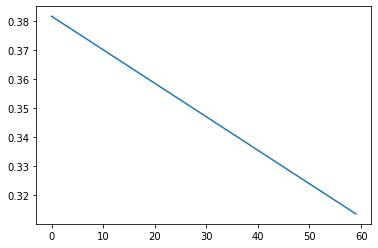

In [41]:
plt.plot(timerange,  x)